In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/Training Data_Case 3.csv", index_col=0)
returns = df.pct_change().dropna()

In [35]:
window = 150

<Axes: ylabel='Frequency'>

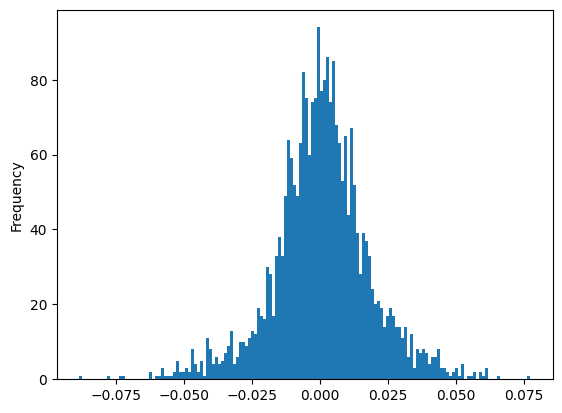

In [36]:
returns['A'].plot.hist(bins=window)

<Axes: ylabel='Frequency'>

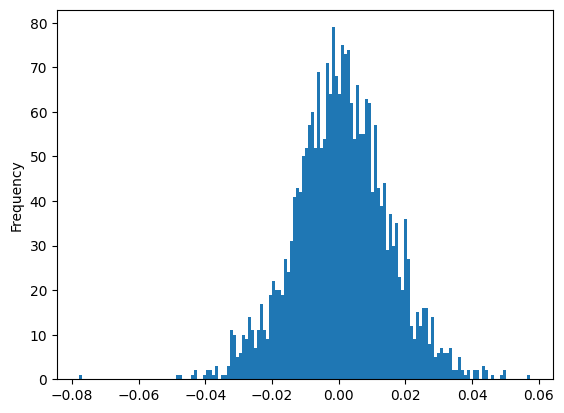

In [37]:
returns['B'].plot.hist(bins=window)

<Axes: ylabel='Frequency'>

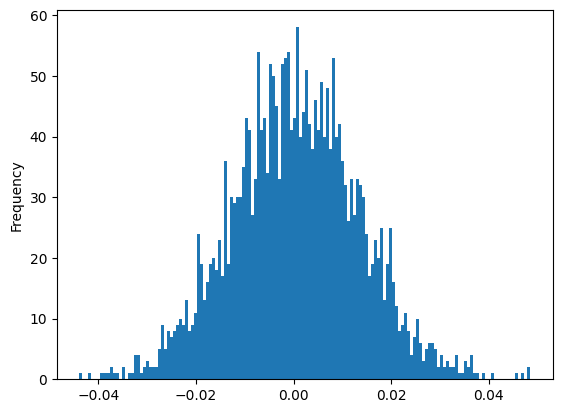

In [38]:
returns['C'].plot.hist(bins=window)

<Axes: ylabel='Frequency'>

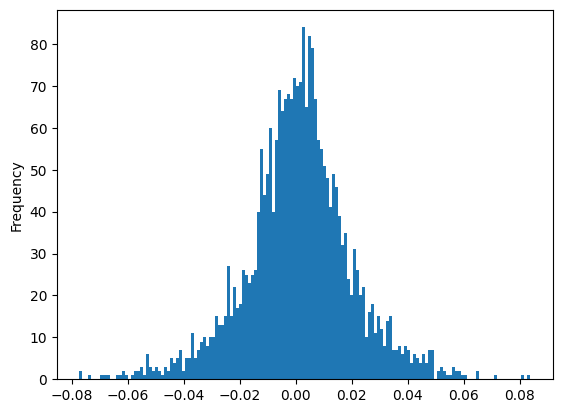

In [39]:
returns['D'].plot.hist(bins=window)

<Axes: ylabel='Frequency'>

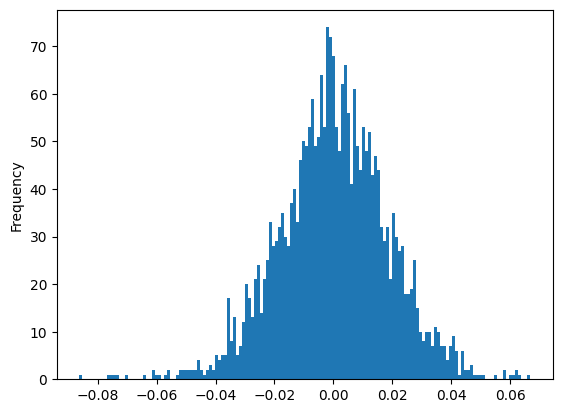

In [40]:
returns['E'].plot.hist(bins=window)

<Axes: ylabel='Frequency'>

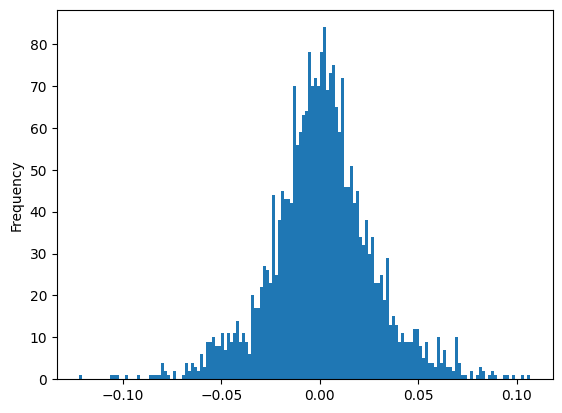

In [41]:
returns['F'].plot.hist(bins=window)

<Axes: ylabel='Frequency'>

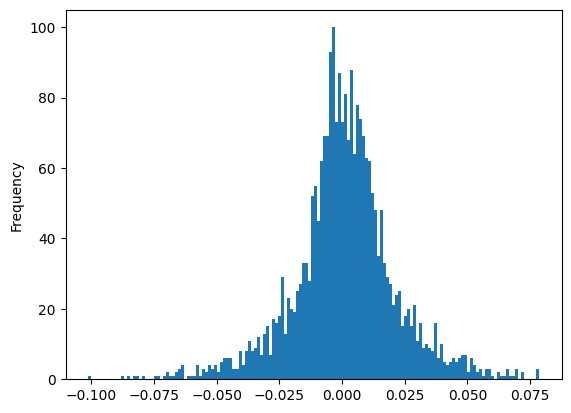

In [42]:
returns['G'].plot.hist(bins=window)

<Axes: ylabel='Frequency'>

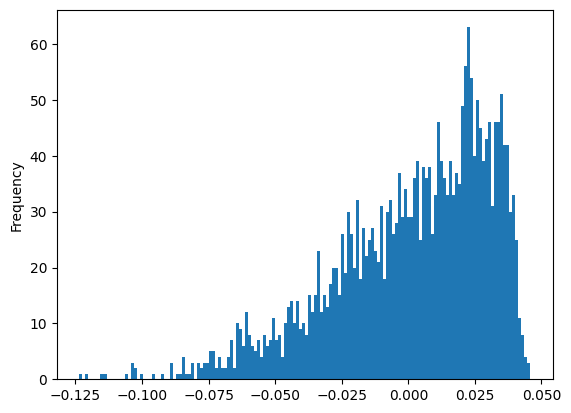

In [43]:
returns['H'].plot.hist(bins=window)

<Axes: ylabel='Frequency'>

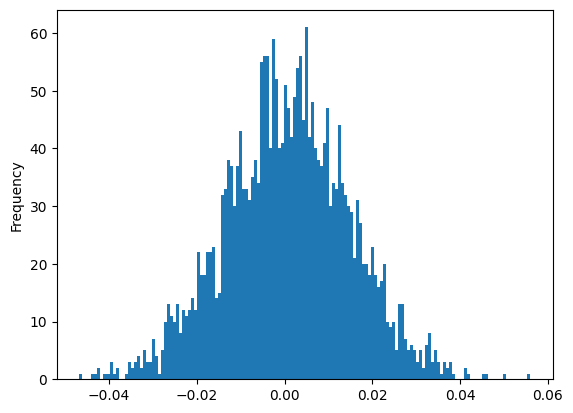

In [44]:
returns['I'].plot.hist(bins=window)

<Axes: ylabel='Frequency'>

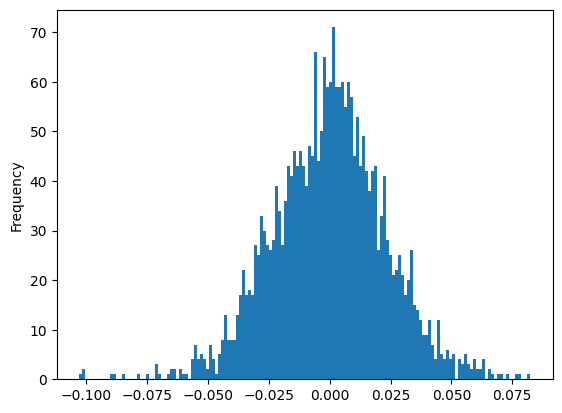

In [45]:
returns['J'].plot.hist(bins=window)

In [48]:
# Define asset returns
returns = returns.to_numpy()[:,:5]

In [49]:
# Calculate expected returns and covariance matrix
exp_returns = np.mean(returns, axis=1)
cov_matrix = np.cov(returns)
exp_returns

array([-3.70791318e-03, -3.54901631e-05,  1.16856858e-02, -3.11098535e-03,
        1.50820212e-02, -6.91449337e-03, -5.84579245e-03,  1.83508493e-02,
        5.46805779e-03,  3.18881624e-04])

In [51]:
# Calculate skewness and kurtosis for each asset
skews = skew(returns, axis=1)
kurts = kurtosis(returns, axis=1)

# Augment the covariance matrix based on skewness and kurtosis
skewness_matrix = np.diag(skews)  # diagonal matrix of skewness values
kurtosis_matrix = np.diag(kurts)  # diagonal matrix of kurtosis values
cov_matrix_augmented = cov_matrix + 0.5 * skewness_matrix + 0.1 * kurtosis_matrix

# Calculate optimal portfolio using MPT with augmented covariance matrix

def calculate_portfolio_variance(weights, exp_returns, cov_matrix):
    port_return = np.sum(exp_returns * weights)
    port_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    return port_var

def calculate_portfolio_return(weights, exp_returns):
    port_return = np.sum(exp_returns * weights)
    return port_return

def check_sum(weights):
    return np.sum(weights) - 1

def optimize_portfolio(exp_returns, cov_matrix):
    num_assets = len(exp_returns)
    args = (exp_returns, cov_matrix)

    constraints = ({'type': 'eq', 'fun': check_sum})
    bounds = tuple((0, 1) for asset in range(num_assets))

    initial_guess = num_assets * [1. / num_assets]
    optimal_portfolio = minimize(calculate_portfolio_variance, initial_guess, args=args, method='SLSQP',
                                  bounds=bounds, constraints=constraints)
    return optimal_portfolio.x

optimal_weights = optimize_portfolio(exp_returns, cov_matrix_augmented)
optimal_return = calculate_portfolio_return(optimal_weights, exp_returns)
optimal_variance = calculate_portfolio_variance(optimal_weights, exp_returns, cov_matrix_augmented)

# Calculate Sharpe ratio
sharpe_ratio = np.sqrt(252) * optimal_return / np.sqrt(abs(optimal_variance))

# Print results
print("Optimal weights:", optimal_weights)
print("Optimal return:", optimal_return)
print("Optimal variance:", optimal_variance)
print("Sharpe ratio:", sharpe_ratio)

Optimal weights: [8.16314569e-13 3.17208749e-13 0.00000000e+00 5.79288848e-13
 1.10977894e-12 5.80952712e-13 7.93819890e-13 1.02950097e-12
 1.00000000e+00 6.48971052e-13]
Optimal return: 0.005468057792248451
Optimal variance: -0.31351752073558903
Sharpe ratio: 0.15502525640831002
